### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### CRIM: 지역별 범죄 발생률
##### ZN: 25,000평방피트를 초과하는 거주 지역의 비율
##### NDUS: 비상업 지역 넓이 비율
##### CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
##### NOX: 일산화질소 농도
##### RM: 거주할 수 있는 방 개수
##### AGE: 1940년 이전에 건축된 소유 주택의 비율
##### DIS: 5개 주요 고용센터까지의 가중 거리
##### RAD: 고속도로 접근 용이도
##### TAX: 10,000달러당 재산세율
##### PTRATIO: 지역의 교사와 학생 수 비율
##### B: 지역의 흑인 거주 비율
##### LSTAT: 하위 계층의 비율
##### MEDV: 본인 소유의 주택 가격(중앙값)

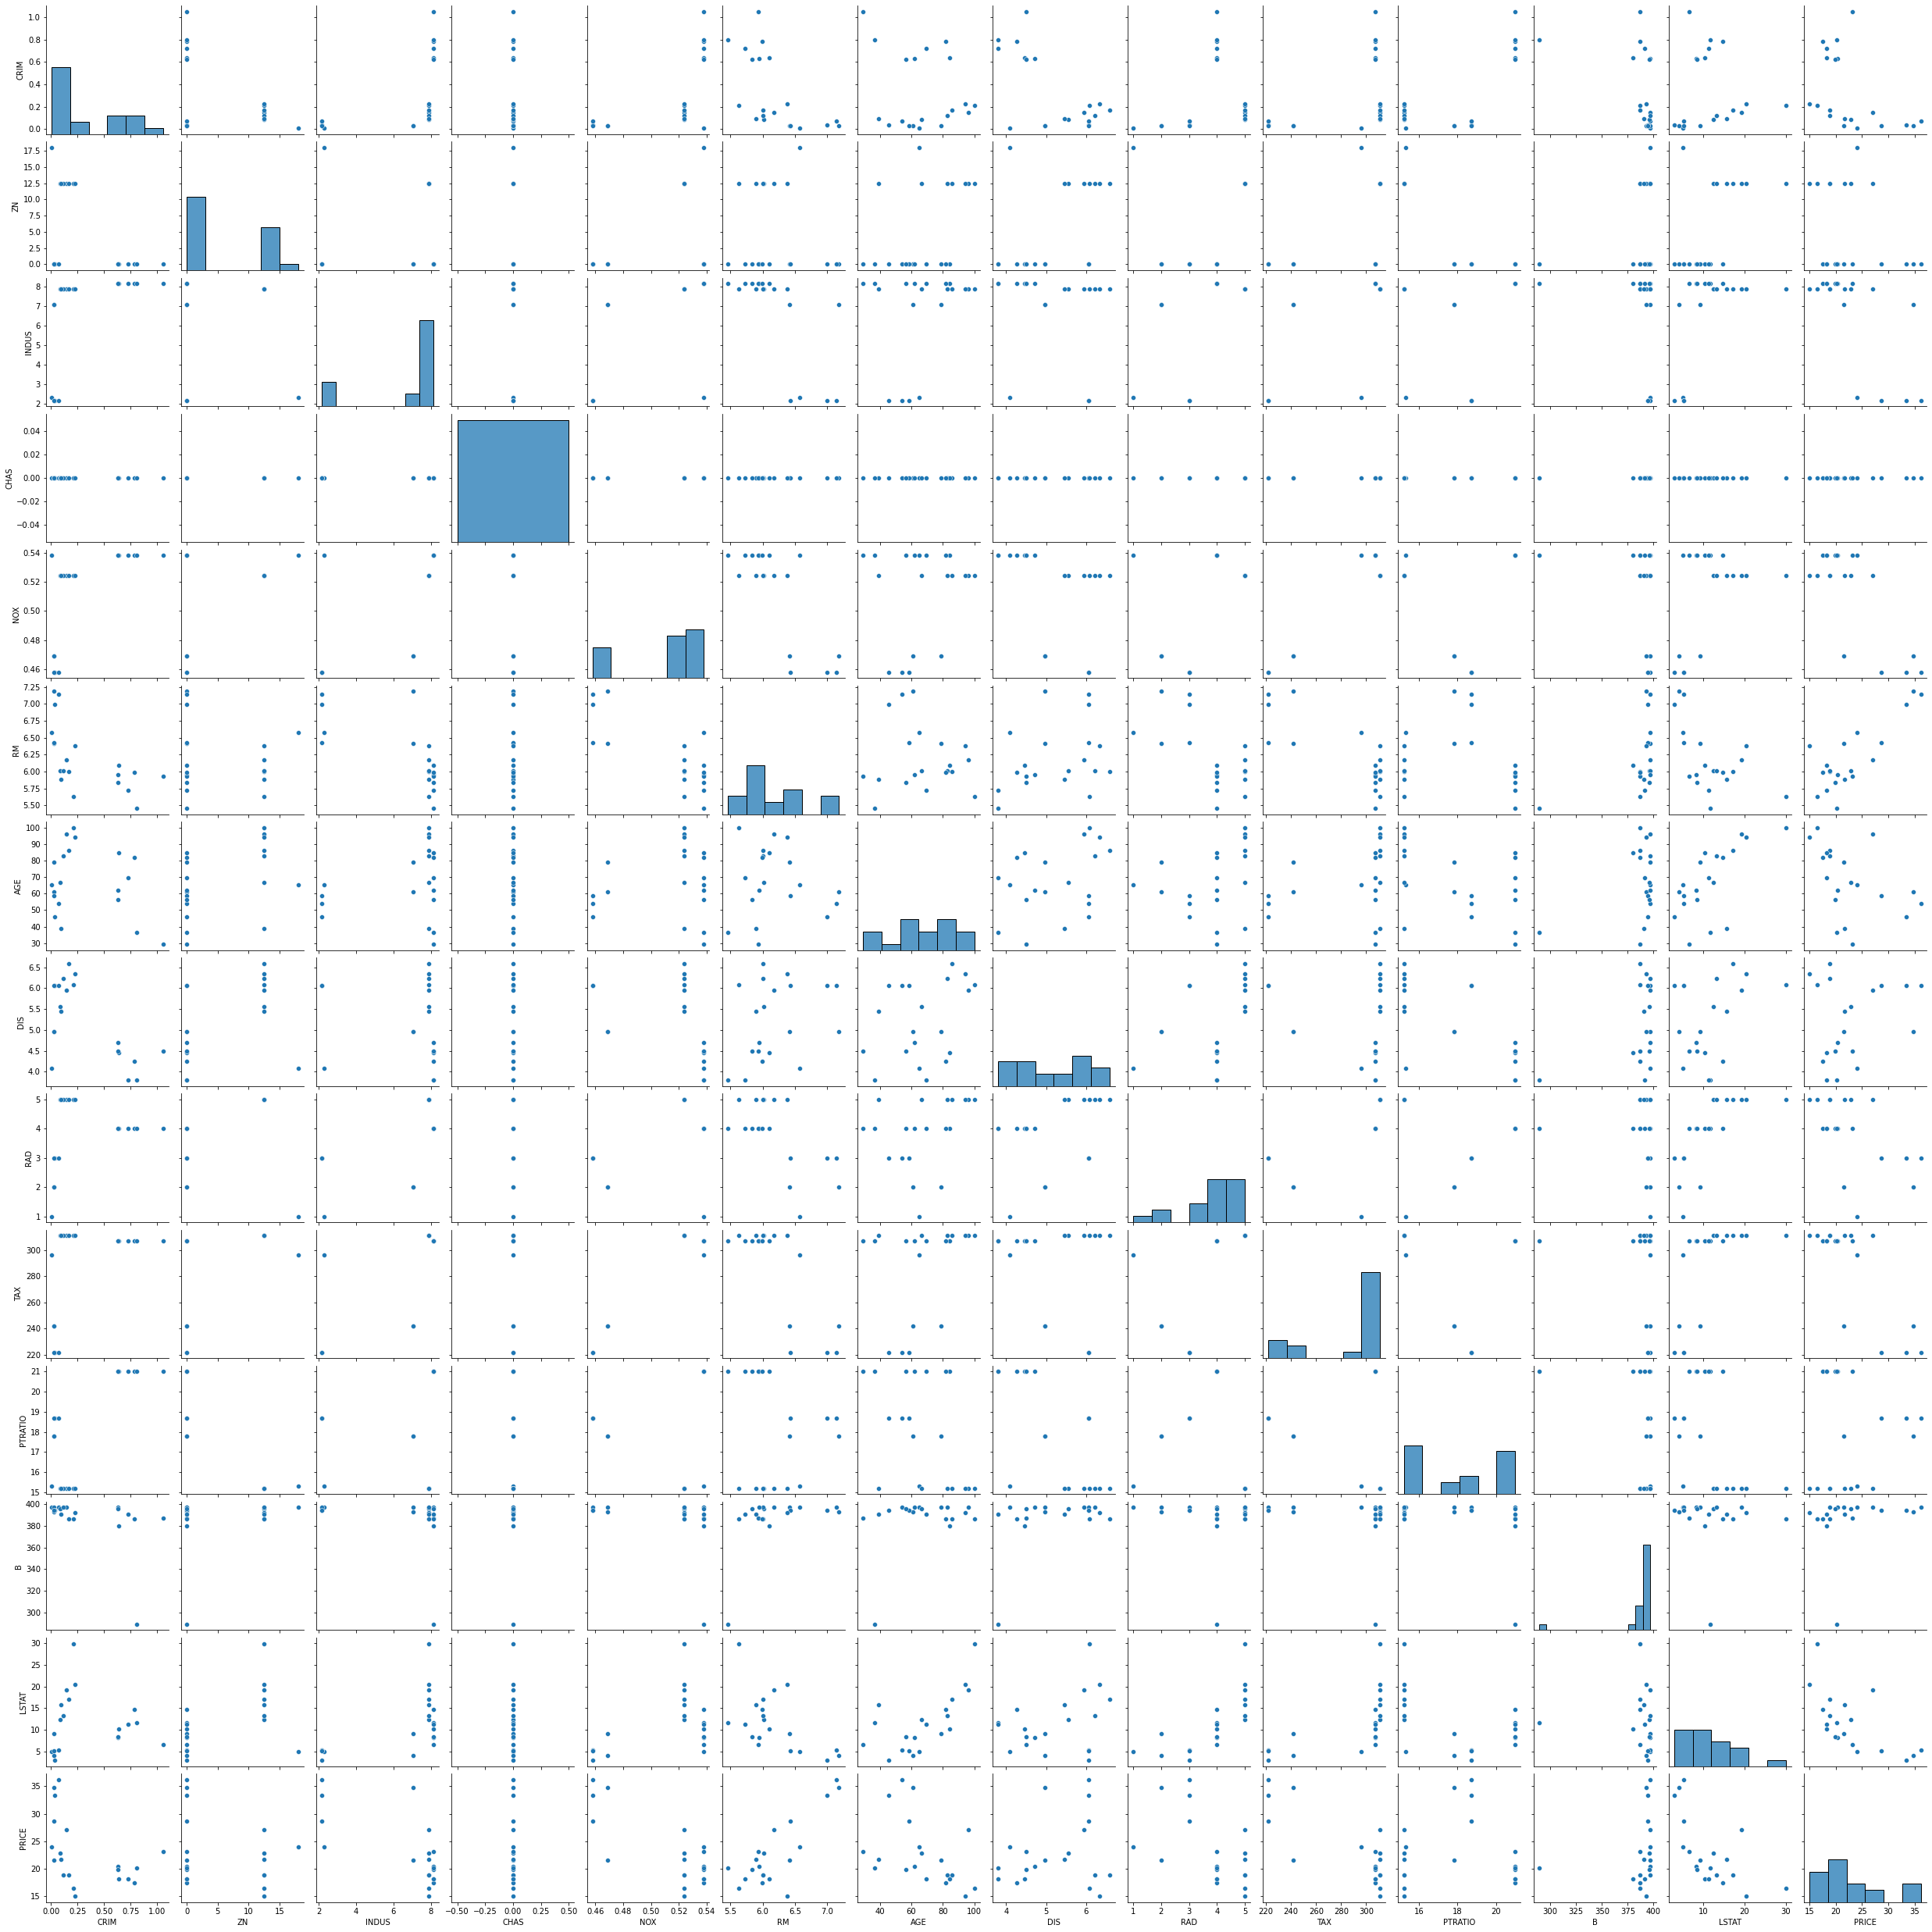

In [2]:
sns.pairplot(data = bostonDF.head(20))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
y_preds

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [5]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 24.291 , RMSE : 4.929
Variance score : 0.669


In [6]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
y_preds

array([22.86569387, 30.83618345, 16.88876557, 23.29469907, 16.90447322,
       21.36309902, 19.21389627, 15.67055594, 21.19985503, 20.99702135,
       20.18664969, 19.66505401,  8.67589403, 21.47767278, 19.54775565,
       26.20765115, 19.19782013,  8.46814322, 45.72481667, 14.86597815,
       24.66948133, 23.81174568, 14.61478139, 23.93571635, 14.78276471,
       14.83510992, 21.27811141, 13.96809607, 19.40150936, 20.97028857,
       19.92060915, 23.30477746, 30.50753261, 20.16085821, 14.56872734,
       15.77378987, 34.44912203, 19.85262101, 20.83009032, 24.24589075,
       19.17357237, 29.72010736, 45.57138333, 19.4235941 , 22.35790855,
       13.75530948, 15.26277625, 24.30291527, 18.30978468, 28.4846984 ,
       21.07657232, 33.90736037, 16.60009553, 26.33010448, 45.46808236,
       21.83612053, 15.66161862, 32.18526235, 22.22925791, 20.47800919,
       25.64621166, 34.08687989, 28.95556183, 18.67900183, 26.90722479,
       17.26767202, 13.88473061, 23.02269049, 28.6636949 , 15.91

In [7]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 8.575 , RMSE : 2.928
Variance score : 0.883


In [8]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 30.246750993924053
회귀 계수값: [ -0.1   0.    0.    2.8 -17.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


In [10]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [11]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}